In [38]:
import requests
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# our own package for reading the data
import sddk

In [142]:
# to always print all columns expanded
pd.set_option('display.max_columns', None)

In [39]:
# read and execute our script for modelling dates
script_url = "https://raw.githubusercontent.com/sdam-au/modelling_temporal_uncertainty/master/scripts/modelling_distributions.py"
# execute the script
exec(requests.get(script_url).content)

In [40]:
conf = sddk.configure("SDAM_root", "648597@au.dk")

sciencedata.dk username (format '123456@au.dk'): 648597@au.dk
sciencedata.dk password: ········
connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


In [182]:
# read the EDH dataset from sciencedata.dk
publicfolder = "b6b6afdb969d378b70929e86e58ad975"
EDH = sddk.read_file("EDH_attrs_cleaned_2020-09-30.json", "df", publicfolder)
EDH.head(5)

reading file located in a public folder


,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean
0,Feraudi,epitaph,3.2-2 cm,0130,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,0071,None,None,None,None,None,None,None,None,None,"[14.0551, 40.8472]",251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD
1,Feraudi,epitaph,4 cm,0200,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",None,marble: rocks - metamorphic rocks,tabula,Roma,85 cm,C(aius) Sextius Paris / qui vixit / annis LXX,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2014-04-07,Lazio,Roma,Latin,HD000002,https://edh-www.adw.uni-heidelberg.de/edh/geog...,AE 1983: Breite: 35 cm.,https://www.trismegistos.org/text/265631,0051,"Via Nomentana, S. Alessandro, Kirche",1937,None,None,None,None,None,None,None,"[12.4823, 41.8955]",265631,"[http://www.trismegistos.org/place/000172, htt...",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,92,Grabinschrift,epitaph,Certain,28.0,85.0,NaN,Marble,tabula,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD
2,Feraudi,honorific inscription,4.5-3 cm,0170,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,marble: rocks - metamorphic rocks,statue base,Baetica,(34) cm,[P(ublio) M]ummio [P(ubli) f(ilio)] / [Gal(eri...,Spain,https://edh-www.adw.uni-heidelberg.de/edh/insc...,None,2006-08-31,Sevilla,Tomares,Latin,HD000003,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(B): [S]isenna ist falscher Kasus; folgende E...,https://www.trismegistos.org/text/220675,0131,None,before 1975,"Sevilla, Privatbesitz",None,None,None,None,None,None,"[-6.0459, 37.3728]",220675,"[http://www.trismegistos.org/place/025443, htt...",Publio Mummio Publi filio Galeria Sisennae Rut...,131 AD – 170 AD,21,unbestimmt,57,Statuenbasis,48,Marmor,1000,69,Ehreninschrift,honorific inscription,Cer

In [184]:
# make sure that we work with numeric values
EDH["not_before"] = pd.to_numeric(EDH["not_before"])
EDH["not_after"] = pd.to_numeric(EDH["not_after"])

In [185]:
EDH.head(5)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean
0,Feraudi,epitaph,3.2-2 cm,130.0,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,71.0,None,None,None,None,None,None,None,None,None,"[14.0551, 40.8472]",251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD
1,Feraudi,epitaph,4 cm,200.0,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",None,marble: rocks - metamorphic rocks,tabula,Roma,85 cm,C(aius) Sextius Paris / qui vixit / annis LXX,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2014-04-07,Lazio,Roma,Latin,HD000002,https://edh-www.adw.uni-heidelberg.de/edh/geog...,AE 1983: Breite: 35 cm.,https://www.trismegistos.org/text/265631,51.0,"Via Nomentana, S. Alessandro, Kirche",1937,None,None,None,None,None,None,None,"[12.4823, 41.8955]",265631,"[http://www.trismegistos.org/place/000172, htt...",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,92,Grabinschrift,epitaph,Certain,28.0,85.0,NaN,Marble,tabula,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD
2,Feraudi,honorific inscription,4.5-3 cm,170.0,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,marble: rocks - metamorphic rocks,statue base,Baetica,(34) cm,[P(ublio) M]ummio [P(ubli) f(ilio)] / [Gal(eri...,Spain,https://edh-www.adw.uni-heidelberg.de/edh/insc...,None,2006-08-31,Sevilla,Tomares,Latin,HD000003,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(B): [S]isenna ist falscher Kasus; folgende E...,https://www.trismegistos.org/text/220675,131.0,None,before 1975,"Sevilla, Privatbesitz",None,None,None,None,None,None,"[-6.0459, 37.3728]",220675,"[http://www.trismegistos.org/place/025443, htt...",Publio Mummio Publi filio Galeria Sisennae Rut...,131 AD – 170 AD,21,unbestimmt,57,Statuenbasis,48,Marmor,1000,69,Ehreninschrift,honorific inscription

In [186]:
len(EDH)

81476

In [187]:
### how many of the inscriptions have at least one date
EDH_dated = EDH[(EDH["not_before"].notnull()) | (EDH["not_after"].notnull())]
len(EDH_dated)

59788

In [188]:
len(EDH_dated[EDH_dated["not_before"].notnull()])

59788

In [166]:
len(EDH_dated[EDH_dated["not_after"].notnull()])

56281

# Exploring "not_before" only

In [167]:
len(EDH_dated[EDH_dated["not_after"].isnull()])

3507

In [189]:
EDH_dated[EDH_dated["not_after"].isnull()].head(20)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean
48,Feraudi,boundary inscription,7-8 cm,NaN,"AE 1983, 0032.; G. Pisani Sartorio, in: G. Bar...",checked with photo,(87) cm,M VALERIVS M F / M N MESSAL / P SERVEILIVS C F...,"[{'praenomen': 'M.', 'cognomen': 'Messalla*', ...",37 cm,travertine: rocks - chemische Sedimente,cippus,Roma,70 cm,M(arcus) Valerius M(arci) f(ilius) / M(ani) n(...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2011-03-17,Lazio,Roma,Latin,HD000049,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Terminalcippus.,https://www.trismegistos.org/text/265587,-54.0,La Magliana,None,"Mentana, Lap. Zeri",http://cil-old.bbaw.de/test06/bilder/datenbank...,None,[https://edh-www.adw.uni-heidelberg.de/fotos/F...,None,data available,None,"[12.4823, 41.8955]",265587,"[http://www.trismegistos.org/place/000172, htt...",Marcus Valerius Marci filius Mani nepos Messal...,54 BC,21,unbestimmt,85,Cippus,71,Travertin,1000,293,Grenzmarkierung,boundary inscription,Certain,87.0,70.0,37.0,Travertine,cippus,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,La Magliana,Certain,54 BC
51,Feraudi,votive inscription,4.3-3 cm,NaN,"AE 1983, 0045.; G. Barbieri, in: G. Barbieri (...",checked through autopsy,(59) cm,PRO SALVTE ET REDITV / ET VICTORIAS DOM N / IM...,"[{'gender': 'male', 'cognomen': 'Antoninus', '...",None,marble: rocks - metamorphic rocks,tabula,Roma?,(69.5) cm,Pro salute et reditu / et victorias(!) dom(ini...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma?,2011-01-17,Lazio?,Roma?,Latin,HD000052,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Inschrift für Caracalla aus der Collezione Mu...,https://www.trismegistos.org/text/251116,213.0,None,None,"Mentana, Lap. Zeri",http://cil-old.bbaw.de/test06/bilder/datenbank...,names of pagan deities,[https://edh-www.adw.uni-heidelberg.de/fotos/F...,None,None,data available,"[12.4823, 41.8955]",251116,"[http://www.trismegistos.org/place/000172, htt...",Pro salute et reditu et victor...,213 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,80,Weihinschrift,votive inscription,Certain,59.0,69.5,NaN,Marble,tabula,Certain,Roma,Uncertain,Italy,Certain,Roma,Uncertain,Lazio,Uncertain,Roma,Uncertain,NULL,NULL,213 AD
53,Cowey,votive inscription,None,NaN,"AE 1983, 0643. (B); J.E. Bogaers, in: B. Hartl...",checked with photo,(49) cm,[ ] ET GENIO LOCI / [ ]GG L VIDVCIVS / [ ]CIDV...,"[{'occupation': 'data available', 'praenomen':...",14 cm,sandstone: rocks - clastic sediments,tabula,Britannia,(63) cm,[---] et Genio loci / [et numinib(us) Au]gg(us...,United Kingdom,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Eburacum,2016-12-30,North Yorkshire,York,Latin,HD000054,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(B): Abweichungen in Lesung und Ergänzung. Se...,https://www.trismegistos.org/text/167301,221.0,Clementhorpe,1976,"York, Yorkshire Mus.",None,names of pagan deities,None,data available,data available,None,"[-

In [229]:
# let's create df
EDH_not_before_only = EDH_dated[EDH_dated["not_after"].isnull()]
len(EDH_not_before_only)

3507

In [230]:
EDH_not_before_only["commentary"] = EDH_not_before_only["commentary"].fillna("")

/home/kasev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [231]:
len(EDH_not_before_only[EDH_not_before_only["commentary"].str.contains("post quem")])

3

In [232]:
len(EDH_not_before_only[EDH_not_before_only["commentary"].str.contains("ante quem")])

2

In [233]:
len(EDH_not_before_only[EDH_not_before_only["origdate_text_clean"].str.contains(r"\d+\.\d+")])

725

In [234]:
print(EDH_not_before_only["origdate_text_clean"].tolist())

['54 BC', '213 AD', '221 AD', '406 AD', '146 AD', '116 AD', '12.2.224 AD', '182 AD', '34 AD', '7 AD', '9 AD', '13.8.232 AD', '332 AD', '270 AD', '201 AD', '79 AD', '211 AD', '306 AD', '218 AD', '238 AD', '98 AD', '8.2.157 AD', '11 BC', '17.9.67 BC', '275 AD', '15.5.87 BC', '14.10.205 AD', '1.9.114 AD', '27.12.159 AD', '27.12.159 AD', '8.2.157 AD', '9.5.136 AD', '38 AD', '108 AD', '19 AD', '15.7.60 AD', '102 AD', '102 AD', '253 AD', '163 AD', '23.8.219 AD', '260 AD', '133 AD', '45 BC', '197 AD', '198 AD', '84 AD', '253 AD', '28.10.144 AD', '26.8.258 AD', '47 AD', '253 AD', '541 AD', '121 AD', '544 AD', '208 AD', '1.2.225 AD', '390 AD', '202 AD', '11.6.313 AD', '11.6.297 AD', '1 AD – 50 AD', '1 AD – 50 AD', '11.6.291 AD', '11.6.159 AD', '20.2.98 AD', '48 AD', '27 BC', '48 AD', '8.210 AD', '202 AD', '17.6.437 AD', '100 AD', '28.8.163 AD', '146 AD', '95 AD', '22.11.106 BC', '214 AD', '1.6.42 AD', '15.5.53 AD', '377 AD', '75 AD', '54 BC', '250 AD', '398 AD', '21.5.55 AD', '262 AD', '166 AD'

In [236]:
# there are some with "NULL" in "origdate_text_clean"
EDH_not_before_only.tail(4)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean
81313,Osnabrügge,votive inscription,None,NaN,"AE 1961, 0239.; CIL 13, 05609.; Y. Le Bohec, I...",provisional,None,[ ] O M / / [ ]T GENIO LO[ ] / Q TA[ ]IVS / SA...,"[{'cognomen': 'Saturninus', 'gender': 'male', ...",None,limestone: rocks - clastic sediments,altar,Germania superior,None,[I(ovi)] O(ptimo) M(aximo) // [e]t Genio lo[ci...,France,https://edh-www.adw.uni-heidelberg.de/edh/insc...,(Civitas Lingonum),2020-05-28,Bourgogne-Franche-Comté,Pontailler-sur-Saône,Latin,HD082227,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Z. 1 befindet sich auf der Bekrönung. Z. 3: T...,None,150.0,ehemalige Kirche,1837,"Dijon, Mus. Arch.",None,names of pagan deities,[https://edh-www.adw.uni-heidelberg.de/fotos/F...,None,None,None,"[5.4128, 47.3048]",None,None,None,None,None,None,None,None,None,None,None,None,None,votive inscription,Certain,NaN,NaN,NaN,Limestone,altar,Certain,Germania superior,Certain,France,Certain,Civitas Lingonum,Uncertain Name,Bourgogne-Franche-Comté,Certain,Pontailler-sur-Saône,Certain,ehemalige Kirche,Certain,NULL
81344,Osnabrügge,honorific inscription,None,NaN,"M. Provost, in: M. Provost u. a. (Hrsg.), La C...",no image,(83) cm,] / POS[ ]I / DEDICATA / PRIMA [ / / IMP ANTON...,"[{'person_id': '1', 'name': 'Prima', 'cognomen...",None,None,None,Germania superior,(42) cm,------] / pos[---]I / dedicata / Prima [------...,France,https://edh-www.adw.uni-heidelberg.de/edh/insc...,(Civitas Lingonum),2020-05-28,Bourgogne-Franche-Comté,Pontailler-sur-Saône,Latin,HD082258,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Lesung und damit auch Datierung unsicher. Auf...,None,139.0,"Rue du 8 Mai 1945, Apotheke",1965,None,None,None,None,None,None,None,"[5.4155, 47.3047]",None,None,None,None,None,None,None,None,None,None,None,None,None,honorific inscription,Certain,83.0,42.0,NaN,NULL,NULL,NULL,Germania superior,Certain,France,Certain,Civitas Lingonum,Uncertain Name,Bourgogne-Franche-Comté,Certain,Pontailler-sur-Saône,Certain,"Rue du 8 Mai 1945, Apotheke",Certain,NULL
81425,Gräf,mile-/leaguestone,5 cm,NaN,"CIL 17, 02, 00134; Zeichnung.",checked with drawing,180 cm,IMP CAE[ ] / DIVI MAGNI [ ] / NINI PII [ ] DIV...,"[{'person_id': '1', 'praenomen': 'M.+++', 'cog...",None,Gesteine,mile-/leaguestone,Germania superior,45 cm,Imp(erator) Cae[s(ar)] / divi Magni [Anto]/nin...,France,https://edh-www.adw.uni-heidelberg.de/edh/insc...,None,2020-08-10,Auvergne-Rhône-Alpes,Prévessin-Moëns,Latin,HD082339,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Zahlreiche Ligaturen. Einige heute nicht mehr...,None,219.0,"Prévessin, de l’Assomption, Kirche, sekundär v...",None,"Prévessin-Moëns, Prévessin, de l’Assomption, K...",None,None,None,None,data available,None,"[6.0811, 46.2541]",None,None,None,None,None,None,None,None,None,None,None,None,None,mile-/leaguestone,Certain,180.0,45.0,NaN,Rock,mile-/leaguestone,Certain,Germania superior,Certain,France,Certain,NULL,

In [256]:
EDH_dated["not_after"].tolist()[:200]

[130.0,
 200.0,
 170.0,
 200.0,
 200.0,
 150.0,
 -51.0,
 200.0,
 300.0,
 200.0,
 68.0,
 400.0,
 300.0,
 96.0,
 300.0,
 150.0,
 -1.0,
 300.0,
 200.0,
 -1.0,
 145.0,
 -1.0,
 230.0,
 375.0,
 30.0,
 100.0,
 200.0,
 -30.0,
 230.0,
 170.0,
 100.0,
 70.0,
 170.0,
 300.0,
 200.0,
 300.0,
 400.0,
 200.0,
 -31.0,
 300.0,
 -1.0,
 -31.0,
 222.0,
 50.0,
 230.0,
 100.0,
 200.0,
 300.0,
 nan,
 200.0,
 300.0,
 nan,
 nan,
 nan,
 200.0,
 300.0,
 100.0,
 200.0,
 300.0,
 50.0,
 200.0,
 211.0,
 200.0,
 300.0,
 400.0,
 250.0,
 200.0,
 300.0,
 -1.0,
 200.0,
 300.0,
 213.0,
 200.0,
 300.0,
 300.0,
 200.0,
 300.0,
 300.0,
 100.0,
 300.0,
 230.0,
 200.0,
 300.0,
 200.0,
 30.0,
 170.0,
 200.0,
 400.0,
 200.0,
 200.0,
 400.0,
 200.0,
 400.0,
 70.0,
 100.0,
 200.0,
 400.0,
 nan,
 100.0,
 -31.0,
 nan,
 230.0,
 -31.0,
 230.0,
 300.0,
 300.0,
 14.0,
 79.0,
 130.0,
 90.0,
 200.0,
 150.0,
 300.0,
 250.0,
 150.0,
 14.0,
 200.0,
 150.0,
 200.0,
 235.0,
 130.0,
 200.0,
 68.0,
 100.0,
 200.0,
 200.0,
 250.0,
 250.0,
 30.0,

In [257]:
import numpy as np

In [258]:
new_not_afters = []
for tup in zip(EDH_dated["not_before"].tolist(), EDH_dated["not_after"].tolist()):
    if np.isnan(tup[1]):
        new_not_afters.append(tup[0])
    else:
        new_not_afters.append(tup[1])
len(new_not_afters)

59788

In [260]:
EDH_dated["not_after_new"] = new_not_afters

/home/kasev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


To some up, there is 81,476 inscriptions in the current version of the database. 59,788 of them have at least `"not_before"` value.  56,281 have both `"not_before"` and `"not_after"`. 

Our modeling functions require at least one date, it might be either a precise date or *post quem* minus one year.

In [265]:
EDH_dated[EDH_dated["id"]=="HD000102"]

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,random_dates,duration,not_after_new
101,Cowey,military diploma,None,NaN,"AE 1983, 0639. (B); M.W.C. Hassall - R.S.O. To...",provisional,5.9 cm,[ ] / [ ] T AE[ ] / [ ]VS AVG PIVS P M / [ ] C...,"[{'cognomen': 'Hadrianus+ Antoninus+', 'name':...",1 cm,Bronze,tabula,Britannia,4.1 cm,[Imp(erator) Caesar divi Hadriani f(ilius) div...,United Kingdom,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Vindolanda,2020-03-02,Northumberland,Chesterholm,Latin,HD000102,https://edh-www.adw.uni-heidelberg.de/edh/geog...,"(B): Außenseite: Z.5: AE, Hassall: Ercu[io]; ...",https://www.trismegistos.org/text/167635,146.0,Lager,1980,"Vindolanda, Museum",None,names of pagan deities,None,data available,data available,data available,"[-2.3606, 54.9912]",167635,"[http://www.trismegistos.org/place/003201, htt...",Imperator Caesar divi Hadriani filius divi Tra...,146 AD,21,unbestimmt,257,Tafel,109,Bronze,1000,91,Militärdiplom,military diploma,Certain,5.9,4.1,1.0,Metal,tabula,Certain,Britannia,Certain,United Kingdom,Certain,Vindolanda,Certain,Northumberland,Certain,Chesterholm,Certain,Lager,Certain,146 AD,"[176, 158, 171, 211, 156, 157, 159, 164, 205, ...",NaN,146.0


# Generate random dates for the whole dataset

In [271]:
%%time
# generate a list of 1000 random dates for each inscription in the dataset
# takes approx. 90 seconds in Google colab
EDH_dated["random_dates"] =EDH_dated.apply(lambda row: model_date(row["not_before"], row["not_after_new"], size=1000,), axis=1)

CPU times: user 28.4 s, sys: 522 ms, total: 28.9 s
Wall time: 28.9 s


/home/kasev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [272]:
def get_duration(start, stop):
  try:
    duration = abs(int(start) - int(stop)) + 1
    if 0 in range(int(start),  int(stop)):
      duration = duration - 1
  except:
    duration = np.nan
  return duration
  

EDH_dated["duration"] = EDH_dated.apply(lambda row: get_duration(row["not_before"], row["not_after_new"]), axis=1)

/home/kasev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [273]:
EDH_dated.head(2)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,random_dates,duration,not_after_new
0,Feraudi,epitaph,3.2-2 cm,130.0,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,71.0,None,None,None,None,None,None,None,None,None,"[14.0551, 40.8472]",251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD,"[99, 103, 117, 84, 126, 125, 80, 112, 107, 129...",60,130.0
1,Feraudi,epitaph,4 cm,200.0,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",None,marble: rocks - metamorphic rocks,tabula,Roma,85 cm,C(aius) Sextius Paris / qui vixit / annis LXX,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2014-04-07,Lazio,Roma,Latin,HD000002,https://edh-www.adw.uni-heidelberg.de/edh/geog...,AE 1983: Breite: 35 cm.,https://www.trismegistos.org/text/265631,51.0,"Via Nomentana, S. Alessandro, Kirche",1937,None,None,None,None,None,None,None,"[12.4823, 41.8955]",265631,"[http://www.trismegistos.org/place/000172, htt...",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,92,Grabinschrift,epitaph,Certain,28.0,85.0,NaN,Marble,tabula,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD,"[71, 96, 60, 66, 121, 73, 150, 92, 124, 175, 1...",150,200.0


In [277]:
for duration in [5, 10, 20, 50, 100, 200]:
    print(duration, len(EDH_dated[EDH_dated["duration"]<= duration]))

5 5930
10 6887
20 9273
50 18433
100 37012
200 52552


Text(0.5, 1.0, '')

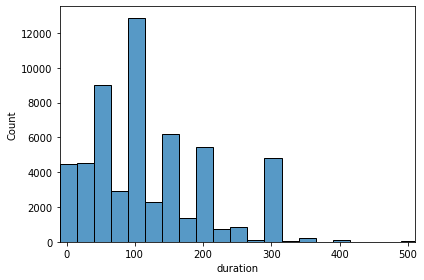

In [281]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
sns.histplot(EDH["duration"], kde=False, bins=range(-10, 650,25), ax=ax)
ax.set_xlim(-10, 510)
ax.set_title("")

In [282]:
sddk.write_file("SDAM_data/EDH/public/EDH_durations.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/EDH/public/EDH_durations.png"


# Simulations with complete dataset

In [51]:
%%time
EDH_complete_simulations = timeblocks_from_randoms(EDH, "random_dates", [-1000, 1000, 50])

CPU times: user 39.6 s, sys: 428 ms, total: 40 s
Wall time: 40.1 s


In [52]:
EDH_complete_simulations[1]

[((-1000, -951), 0),
 ((-950, -901), 0),
 ((-900, -851), 0),
 ((-850, -801), 0),
 ((-800, -751), 0),
 ((-750, -701), 0),
 ((-700, -651), 0),
 ((-650, -601), 0),
 ((-600, -551), 0),
 ((-550, -501), 1),
 ((-500, -451), 0),
 ((-450, -401), 0),
 ((-400, -351), 2),
 ((-350, -301), 3),
 ((-300, -251), 9),
 ((-250, -201), 16),
 ((-200, -151), 38),
 ((-150, -101), 74),
 ((-100, -51), 230),
 ((-50, -1), 1029),
 ((1, 50), 4776),
 ((51, 100), 6406),
 ((101, 150), 10090),
 ((151, 200), 12526),
 ((201, 250), 11192),
 ((251, 300), 5997),
 ((301, 350), 1593),
 ((351, 400), 1374),
 ((401, 450), 738),
 ((451, 500), 598),
 ((501, 550), 416),
 ((551, 600), 383),
 ((601, 650), 139),
 ((651, 700), 98),
 ((701, 750), 21),
 ((751, 800), 7),
 ((801, 850), 2),
 ((851, 900), 1),
 ((901, 950), 1),
 ((951, 1000), 1)]

In [53]:
def desc_stat_from_simulations(simulations):
  tups_desc = []
  for n in range(len(simulations[0])):
    values = [sim[n][1] for sim in simulations]
    tups_desc.append((simulations[0][n][0], np.min(values), np.max(values), np.mean(values), np.median(values)))
  tups_desc_df = pd.DataFrame(tups_desc)
  tups_desc_df.columns = ["temp_block", "min", "max", "mean", "median"]
  return tups_desc_df

In [54]:
sims_by_blocks = desc_stat_from_simulations(EDH_complete_simulations)
sims_by_blocks.set_index("temp_block", inplace=True)
sims_by_blocks

,min,max,mean,median
temp_block,,,,
"(-1000, -951)",0,0,0.000,0.0
"(-950, -901)",0,0,0.000,0.0
"(-900, -851)",0,0,0.000,0.0
"(-850, -801)",0,0,0.000,0.0
"(-800, -751)",0,0,0.000,0.0
"(-750, -701)",0,0,0.000,0.0
"(-700, -651)",0,0,0.000,0.0
"(-650, -601)",0,0,0.000,0.0
"(-600, -551)",0,0,0.000,0.0


In [55]:
from pandas.plotting import table

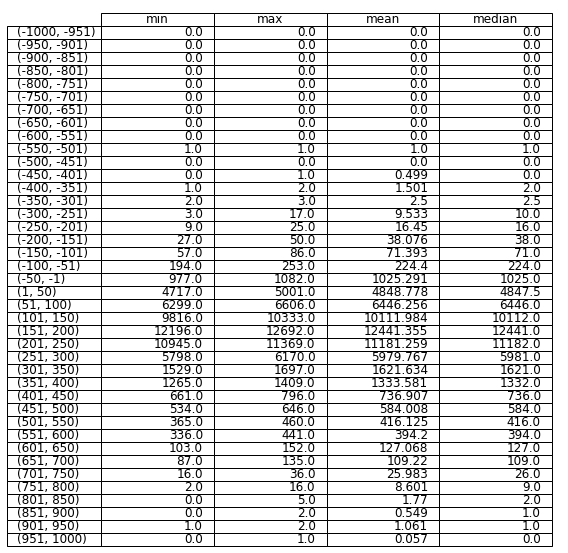

In [56]:
fig, ax = plt.subplots(figsize=(8,6), tight_layout=True)
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)
tabla = table(ax, sims_by_blocks, loc='upper right', colWidths=[0.2]*len(sims_by_blocks.columns))
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) 

In [57]:
sddk.write_file("SDAM_data/temporal_uncertainty/EDH_sims_by_blocks.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/sharingout/648597%40au.dk/SDAM_root/SDAM_data/temporal_uncertainty/EDH_sims_by_blocks.png"


In [58]:
sddk.write_file("SDAM_data/temporal_uncertainty/EDH_sims_by_blocks.csv", sims_by_blocks, conf)

Your <class 'pandas.core.frame.DataFrame'> object has been succefully written as "https://sciencedata.dk/sharingout/648597%40au.dk/SDAM_root/SDAM_data/temporal_uncertainty/EDH_sims_by_blocks.csv"


In [59]:
# compare in how many instances is there less inscriptions for the first half of the 2nd c. than for the second half.
len([sim for sim in EDH_complete_simulations if sim[18][1] < sim[19][1]])

1000

In [60]:
len([date for date in EDH_date_avr if not np.isnan(date)])

NameError: ignored